<a href="https://colab.research.google.com/github/coderlakshayjain/ds-ml-playground/blob/main/Support_vector_machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

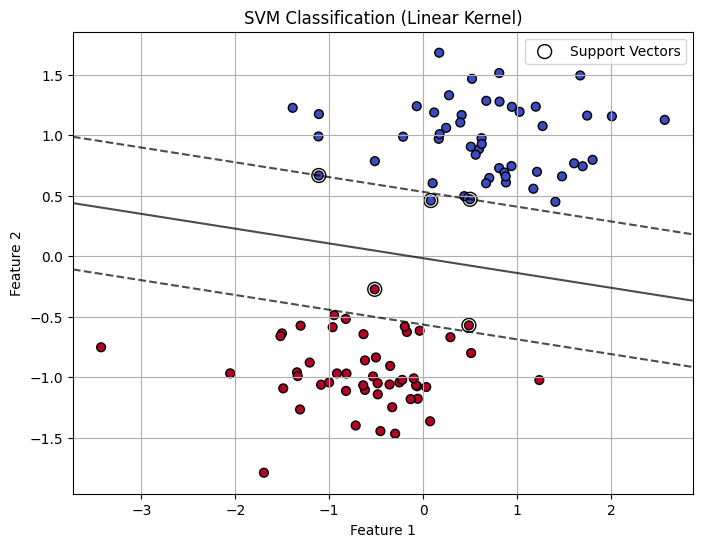

Support vectors:
 [[ 0.49822708  0.4707399 ]
 [ 0.08095889  0.46023797]
 [-1.11081629  0.66745259]
 [-0.51620058 -0.27365124]
 [ 0.48646662 -0.57165145]]
Model Coefficients: [[-0.22292728 -1.82346986]]
Intercept: [-0.03055156]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# 1. Create a toy dataset
X, y = make_blobs(n_samples=100, centers=2, random_state=6)

# 2. Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Fit a linear SVM model
model = svm.SVC(kernel='linear', C=1.0)
model.fit(X_scaled, y)

# 4. Plotting decision boundary
def plot_decision_boundary(X, y, model):
    # Indent the following lines to be part of the function
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=40, edgecolors='k')

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # Plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.7,
               linestyles=['--', '-', '--']) # Ensure this line is also indented

    # Plot support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k', label='Support Vectors')
    plt.title("SVM Classification (Linear Kernel)")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.grid(True)
    plt.show()

# 5. Call the plot function
plot_decision_boundary(X_scaled, y, model)

# 6. Print model details
print("Support vectors:\n", model.support_vectors_)
print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)